# TimeGPT Quickstart

> Unlock the power of accurate predictions and confidently navigate uncertainty. Reduce uncertainty and resource limitations. With TimeGPT, you can effortlessly access state-of-the-art models to make data-driven decisions. Whether you're a bank forecasting market trends or a startup predicting product demand, TimeGPT democratizes access to cutting-edge predictive insights, eliminating the need for a dedicated team of machine learning engineers.

## Introduction

Nixtla's TimeGPT is a generative pre-trained model trained to forecast time series data. The inputs to TimeGPT are time series data, and the model generates forecast outputs based on these. The input involves providing the historical data and potentially defining parameters such as the forecast horizon. TimeGPT can be used across a plethora of tasks including demand forecasting, anomaly detection, financial forecasting, and more. 

The TimeGPT model "reads" time series data much like the way humans read a sentence – from left to right. It looks at a chunk of past data, which we can think of as "tokens", and predicts what comes next. This prediction is based on patterns the model identifies in past data, much like how a human would predict the end of a sentence based on the beginning.

The TimeGPT API provides an interface to this powerful model, allowing users to leverage its forecasting capabilities to predict future events based on past data. With this API, users can not only forecast future events but also delve into various time series-related tasks, such as what-if scenarios, anomaly detection, and more.

![figure](../../img/timegpt-arch.png)

## Usage

In [ ]:
#| hide
from dotenv import load_dotenv

In [ ]:
#| hide
load_dotenv()

True

In [ ]:
import os

from nixtlats import TimeGPT

You can instantiate the `TimeGPT` class providing your credentials.

In [ ]:
timegpt = TimeGPT(token=os.environ['TIMEGPT_TOKEN'])

You can test the validate of your token calling the `validate_token` method:

In [ ]:
timegpt.validate_token()

INFO:nixtlats.timegpt:Happy Forecasting! :), If you have questions or need support, please email ops@nixtla.io


True

Now you can start to make forecasts! Let's import an example:

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/air_passengers.csv')
df.head()

,timestamp,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


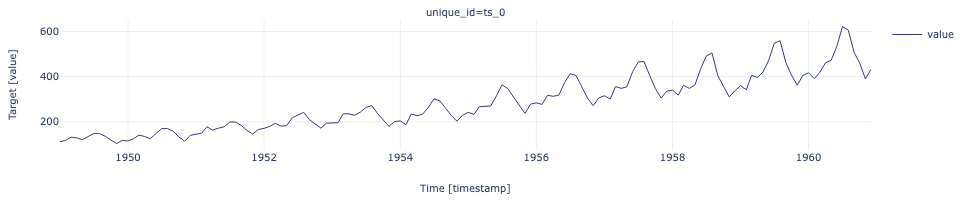

In [ ]:
timegpt.plot(df, time_col='timestamp', target_col='value', engine='plotly')

Now we can forecast this dataset. We observe that this dataset has monthly frequency. We have to pass the right pandas frequency to `TimeGPT` to have the right forecasts. In this case 'MS'. Let's forecast the next 12 observations. In this case we also have to define:

- `time_col`: Column that identifies the datestamp column.
- `target_col`: The variable that we want to forecast.

In [ ]:
timegpt_fcst_df = timegpt.forecast(df=df, h=12, time_col='timestamp', target_col='value')
timegpt_fcst_df.head()

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...


,timestamp,TimeGPT
0,1961-01-01,437.837921
1,1961-02-01,426.062714
2,1961-03-01,463.116547
3,1961-04-01,478.244507
4,1961-05-01,505.646484


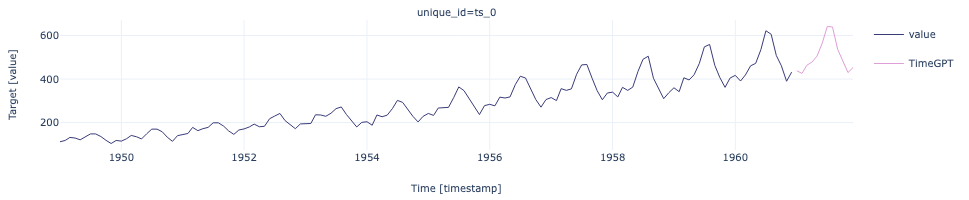

In [ ]:
timegpt.plot(df, timegpt_fcst_df, time_col='timestamp', target_col='value')

You can also produce a larger forecast horizon:

In [ ]:
timegpt_fcst_df = timegpt.forecast(df=df, h=36, time_col='timestamp', target_col='value')
timegpt_fcst_df.head()

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...


,timestamp,TimeGPT
0,1961-01-01,437.837921
1,1961-02-01,426.062714
2,1961-03-01,463.116547
3,1961-04-01,478.244507
4,1961-05-01,505.646484


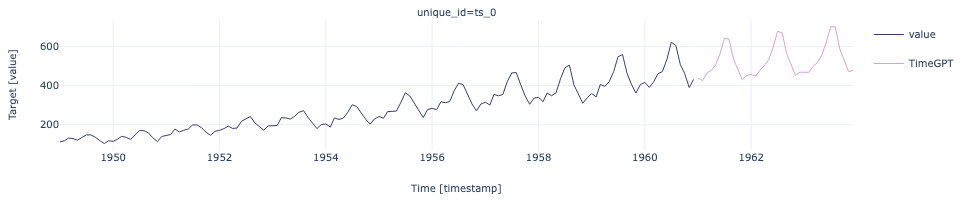

In [ ]:
timegpt.plot(df, timegpt_fcst_df, time_col='timestamp', target_col='value')

Or a shorter one:

INFO:nixtlats.timegpt:Validating inputs...
INFO:nixtlats.timegpt:Preprocessing dataframes...
INFO:nixtlats.timegpt:Calling Forecast Endpoint...


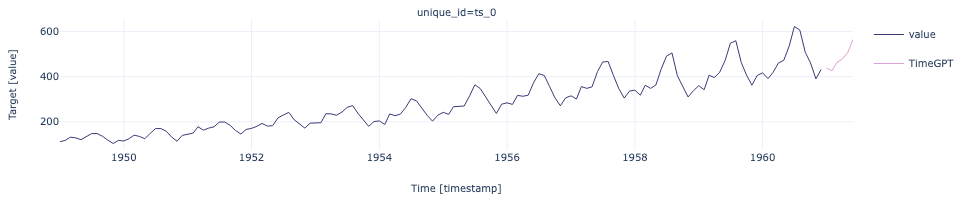

In [ ]:
timegpt_fcst_df = timegpt.forecast(df=df, h=6, time_col='timestamp', target_col='value')
timegpt.plot(df, timegpt_fcst_df, time_col='timestamp', target_col='value')